In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tableone import TableOne
from sklearn.manifold import TSNE

In [3]:
data = pd.read_csv('dataset/in_and_out.csv',encoding='cp949')

data

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202504,1호선,동대문,650,26,11355,2005,10238,7181,18411,...,9939,938,3210,3,321,0,0,0,0,20250503
1,202504,1호선,동묘앞,117,3,2844,819,4206,5444,9689,...,4897,120,1996,3,267,0,0,0,0,20250503
2,202504,1호선,서울역,712,48,10654,9668,29272,64058,97455,...,29252,5212,8018,10,262,0,0,0,0,20250503
3,202504,1호선,시청,124,5,2267,5900,3888,28761,7841,...,3763,606,1015,0,15,0,0,0,0,20250503
4,202504,1호선,신설동,381,18,9393,2330,10420,9020,24157,...,9416,455,3039,0,0,1,2,0,0,20250503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14857,202305,중앙선,원덕,95,0,394,6,740,182,885,...,328,3,80,0,0,0,0,0,0,20230603
14858,202305,중앙선,중랑,153,5,6886,593,10126,2329,24074,...,5311,34,486,0,0,0,0,0,0,20230603
14859,202305,중앙선,지평,0,0,0,0,4,2,384,...,0,0,0,0,0,0,0,0,0,20230603
14860,202305,중앙선,팔당,0,0,259,78,726,728,1658,...,202,0,0,0,0,0,0,0,0,20230603


In [3]:
print(data['사용월'].value_counts())

사용월
202403    622
202406    622
202503    621
202502    621
202410    621
202411    621
202501    621
202412    621
202312    621
202409    621
202404    621
202407    621
202504    620
202402    620
202405    620
202408    619
202401    619
202311    617
202310    617
202309    616
202308    616
202307    616
202306    614
202305    614
Name: count, dtype: int64


In [4]:
columns = ['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원',
           '05시-06시 승차인원', '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원',
           '07시-08시 승차인원', '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원',
           '09시-10시 승차인원', '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원',
           '11시-12시 승차인원', '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원',
           '13시-14시 승차인원', '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원',
           '15시-16시 승차인원', '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원',
           '17시-18시 승차인원', '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원',
           '19시-20시 승차인원', '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원',
           '21시-22시 승차인원', '21시-22시 하차인원', 
           '22시-23시 승차인원', '22시-23시 하차인원', 
           '23시-24시 승차인원', '23시-24시 하차인원', 
           ]
categorical = ['사용월', '호선명', '지하철역']

tb1 = TableOne(data, columns=columns, categorical=categorical, groupby='사용월', pval=True)
print(tb1.tabulate(tablefmt='github'))

|                               |                               | Missing   | Overall           | 202305            | 202306            | 202307            | 202308            | 202309            | 202310            | 202311            | 202312            | 202401            | 202402            | 202403            | 202404            | 202405            | 202406            | 202407            | 202408            | 202409            | 202410            | 202411            | 202412            | 202501            | 202502            | 202503            | 202504            | P-Value   |
|-------------------------------|-------------------------------|-----------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------

In [5]:
tb2 = TableOne(data, columns=columns, categorical=categorical, groupby='호선명', pval=True)
print(tb2.tabulate(tablefmt='github'))

|                               |                               | Missing   | Overall           | 1호선              | 2호선             | 3호선             | 4호선             | 5호선             | 6호선             | 7호선             | 8호선             | 9호선             | 9호선2~3단계      | 경강선            | 경부선            | 경원선            | 경의선            | 경인선            | 경춘선          | 공항철도 1호선    | 과천선            | 분당선            | 서해선           | 수인선           | 신림선            | 안산선            | 우이신설선       | 일산선            | 장항선          | 중앙선            | P-Value   |
|-------------------------------|-------------------------------|-----------|-------------------|--------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-----------------|------------------

In [6]:
feature_cols = [col for col in data.columns if '승차인원' in col or '하차인원' in col]
X = data[feature_cols].values

# 호선명 카테고리 인코딩
color_labels = data['호선명'].astype('category').cat.codes

# t-SNE 실행 (perplexity는 샘플 수 미만이어야 함)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 시각화
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_labels, cmap='viridis', alpha=0.7)
plt.title('t-SNE: 호선별별 시간대 승하차 패턴')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='호선명')
plt.show()

KeyboardInterrupt: 

In [ ]:
feature_cols = [col for col in data.columns if '승차인원' in col or '하차인원' in col]
X = data[feature_cols].values

# 호선명 카테고리 인코딩
color_labels1 = data['사용월'].astype('category').cat.codes

# t-SNE 실행 (perplexity는 샘플 수 미만이어야 함)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 시각화
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_labels1, cmap='viridis', alpha=0.7)
plt.title('t-SNE: 사용월별 시간대 승하차 패턴')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='호선명')
plt.show()

c:\Users\kkh02\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\kkh02\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kkh02\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\kkh02\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\kkh02\AppData\Roaming\Python\Python310\site-packages\IPython\co

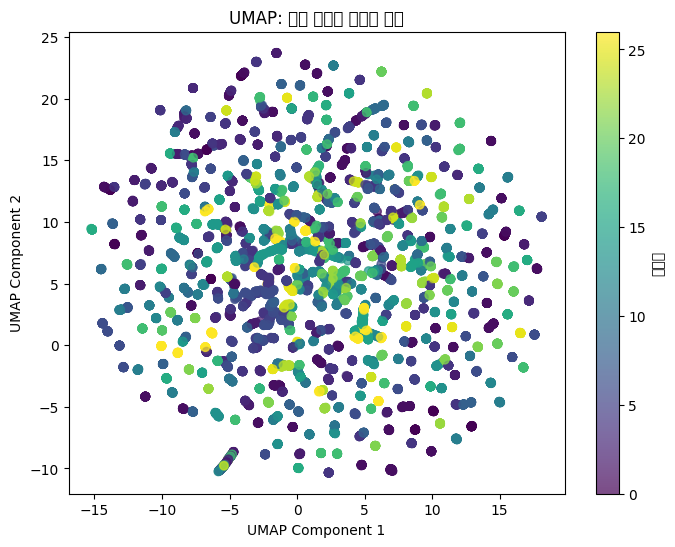

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# 시간대별 승차/하차 인원 컬럼만 추출
feature_cols = [col for col in data.columns if '승차인원' in col or '하차인원' in col]
X = data[feature_cols].values

# 호선명을 정수로 인코딩해 색상 구분
le = LabelEncoder()
color_labels = le.fit_transform(data['호선명'])

# UMAP 차원축소
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)

# 시각화
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color_labels, cmap='viridis', alpha=0.7)
plt.title('UMAP: 역별 시간대 승하차 패턴')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, label='호선명')
plt.show()


In [8]:

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap
import seaborn as sns

# 시간대별 승차/하차 인원 컬럼 선택
feature_cols = [col for col in data.columns if '승차인원' in col or '하차인원' in col]
X = data[feature_cols].values

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE 적용 
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# UMAP 적용 
umap_model = umap.UMAP(n_components=2, n_neighbors=2, min_dist=0.3, metric='euclidean', random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# 호선명 카테고리 인코딩 (색상 구분)
color_labels = data['호선명'].astype('category').cat.codes

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=color_labels, palette='tab10', ax=ax[0])
ax[0].set_title('t-SNE Visualization')
ax[0].set_xlabel('t-SNE Component 1')
ax[0].set_ylabel('t-SNE Component 2')

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=color_labels, palette='tab10', ax=ax[1])
ax[1].set_title('UMAP Visualization')
ax[1].set_xlabel('UMAP Component 1')
ax[1].set_ylabel('UMAP Component 2')

plt.tight_layout()
plt.show()


c:\Users\kkh02\llll\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\kkh02\llll\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kkh02\llll\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KeyboardInterrupt: 